In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)


Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')
y_train = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.compile(optimizer='rmsprop',
             loss='mean_squared_error',
             metrics=['accuracy'])

In [5]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mean_squared_error',
             metrics=['accuracy'])

In [6]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.mean_squared_error,
             metrics=[metrics.binary_accuracy])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
model.compile(optimizer='rmsprop',
             loss='mean_squared_error',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 19s 1ms/step - loss: 0.2501 - acc: 0.5016 - val_loss: 0.2501 - val_acc: 0.5009
Epoch 2/5
15000/15000 [==============================] - 7s 497us/step - loss: 0.2490 - acc: 0.5275 - val_loss: 0.2501 - val_acc: 0.4999
Epoch 3/5
 1024/15000 [=>............................] - ETA: 3:41 - loss: 0.2467 - acc: 0.5791

H:\Installed\Anaconda\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171131). Check your callbacks.
  % delta_t_median)


 1536/15000 [==>...........................] - ETA: 2:24 - loss: 0.2462 - acc: 0.5898

H:\Installed\Anaconda\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.156693). Check your callbacks.
  % delta_t_median)
H:\Installed\Anaconda\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.142255). Check your callbacks.
  % delta_t_median)


15000/15000 [==============================] - 21s 1ms/step - loss: 0.2448 - acc: 0.5712 - val_loss: 0.2516 - val_acc: 0.5042
Epoch 4/5
15000/15000 [==============================] - 5s 361us/step - loss: 0.2393 - acc: 0.5950 - val_loss: 0.2572 - val_acc: 0.4987
Epoch 5/5
15000/15000 [==============================] - 5s 333us/step - loss: 0.2337 - acc: 0.6128 - val_loss: 0.2569 - val_acc: 0.5064


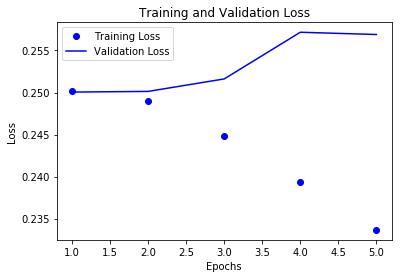

In [9]:
# import matplotlib.pyplot as plt

# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss_value, 'b', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.lagend()

# plt.show()

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
